In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
test = pd.read_csv("Tests.csv", sep=';')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TestId     3148 non-null   object
 1   RawDataId  3148 non-null   object
 2   Date       3148 non-null   object
 3   Time       3148 non-null   object
 4   Systolic   3148 non-null   int64 
 5   Diastolic  3148 non-null   int64 
 6   MAP        3148 non-null   int64 
 7   HR         3148 non-null   int64 
 8   PP         3148 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 221.5+ KB


In [8]:
completos = pd.read_csv("Completos.csv", sep=';')

In [9]:
df_unido = pd.merge(test, completos, on='TestId', how='right')

In [10]:
df_unido.shape

(4845, 32)

- Luego de subir dos csv lo que hicimos fue unirlos en uno desde la key TestId.
- En esta etapa seguimos con ver las columnas que poseen los unidos, para seleccionar los que usaremos para el análisis.

In [12]:
df_unido.columns

Index(['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'SystolicMax', 'SystolicMin', 'DiastolicMax',
       'DiastolicMin', 'MAPMax', 'MAPMin', 'PPMax', 'PPMin', 'HRMax', 'HRMin',
       'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate'],
      dtype='object')

In [13]:
df_limpio = df_unido[['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate']]

In [14]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     4845 non-null   object 
 1   RawDataId                  3148 non-null   object 
 2   Date                       3148 non-null   object 
 3   Time                       3148 non-null   object 
 4   Systolic                   3148 non-null   float64
 5   Diastolic                  3148 non-null   float64
 6   MAP                        3148 non-null   float64
 7   HR                         3148 non-null   float64
 8   PP                         3148 non-null   float64
 9   PatientId                  4845 non-null   object 
 10  Interpretation             4798 non-null   object 
 11  HookupStartTime            4845 non-null   object 
 12  HookupEndTime              4845 non-null   object 
 13  Duration                   4845 non-null   objec

In [15]:
df_limpio['PercentSuccessfullReading'].describe()

count     4845
unique      62
top        98%
freq      1080
Name: PercentSuccessfullReading, dtype: object

**Relaciones entre Variables:**
- Analizar la relación entre pares de variables para identificar patrones o correlaciones.
Utilizar gráficos de dispersión (scatter plots) y mapas de calor de correlación (heatmaps) para evaluar la relación entre variables numéricas.
- Comparaciones Categóricas: Explorar cómo las variables categóricas afectan a las variables numéricas, utilizando gráficos de barras y boxplots

- Heatmaps de Correlación: permitirá evaluar la relación entre todas las variables de presión arterial. Esto es útil para identificar correlaciones fuertes o débiles entre las variables sistólicas y diastólicas:
  Se muestra una correlación positiva fuerte , el valor cerecano a 1 en la celda que cruza sistólica y diastólica indica una correlación positiva muy fuerte entre ambas variables. A medida que aumenta la presión sistólica aumenta la diastólica. y viceverza.


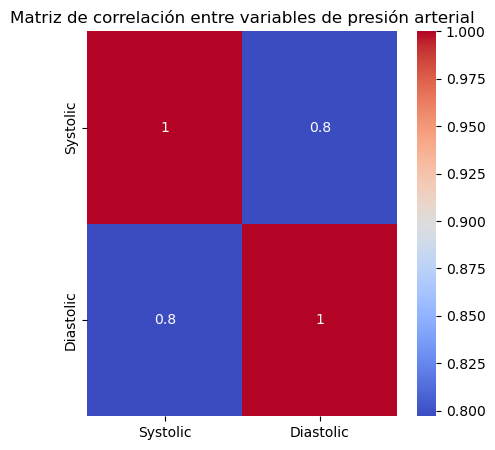

In [18]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_unido[['Systolic','Diastolic', ]].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables de presión arterial')
plt.show()


Este Gráfico examina la relación entre dos variables numéricas: la edad y la presión sistólica. De manera general, en este caso, se agrupan las edades en rangos y se calcula la media de la presión sistólica en cada grupo de edad, lo que permite visualizar cómo cambia la presión sistólica en función de la edad. La línea conecta los puntos que representan el promedio de la presión sistólica en cada grupo de edad, lo permite observar cómo la presión sistólica varía a medida que las personas envejecen. 
Tendencia: Si la línea tiene una pendiente ascendente, indica que a medida que la edad aumenta, el promedio de la presión sistólica también aumenta. Si es descendente, significaría que la presión sistólica disminuye con la edad.
Relación: Este gráfico muestra de manera visual la relación entre la variable edad (agrupada) y la variable presión sistólica, destacando las tendencias promedias.  

/tmp/ipykernel_5475/2075963648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '51-60', '61-70', '71-80', '81-90'])
/tmp/ipykernel_5475/2075963648.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df_limpio.groupby('Age_Group')['Systolic'].mean().reset_index()


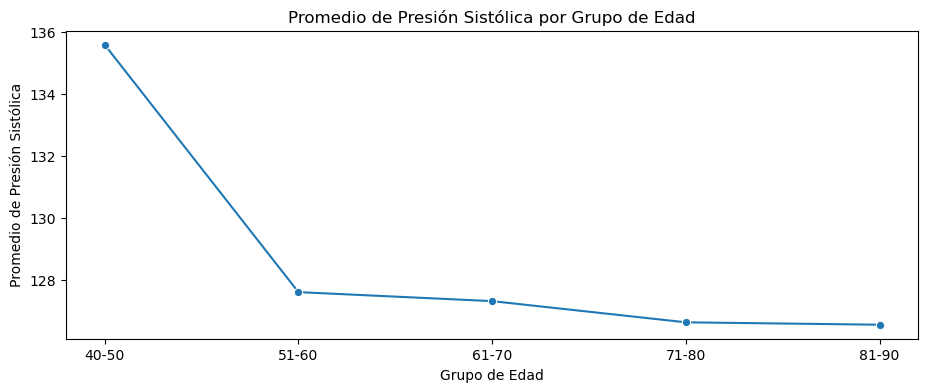

In [50]:
df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '51-60', '61-70', '71-80', '81-90'])

age_grouped = df_limpio.groupby('Age_Group')['Systolic'].mean().reset_index()

plt.figure(figsize=(11, 4))
sns.lineplot(x='Age_Group', y='Systolic', data=age_grouped, marker='o')
plt.title('Promedio de Presión Sistólica por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Promedio de Presión Sistólica')
plt.show()



Boxplot: Muestra la distribución, como varía la presión sistólica en diferentes grupos de edad. Los datos se agrupan en rangos de edad (0-20, 21-40, 41-60, etc.), y para cada grupo, el boxplot muestra:

La mediana (línea dentro de la caja).
El rango intercuartílico (Q1 a Q3, la caja).
Valores atípicos (puntos fuera de los "bigotes").
Los "bigotes" representan la dispersión de los datos sin considerar los outliers.
Puedes ver si la presión tiende a aumentar en grupos de mayor edad, o si hay mucha variabilidad dentro de un grupo.

/tmp/ipykernel_5475/3940095801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


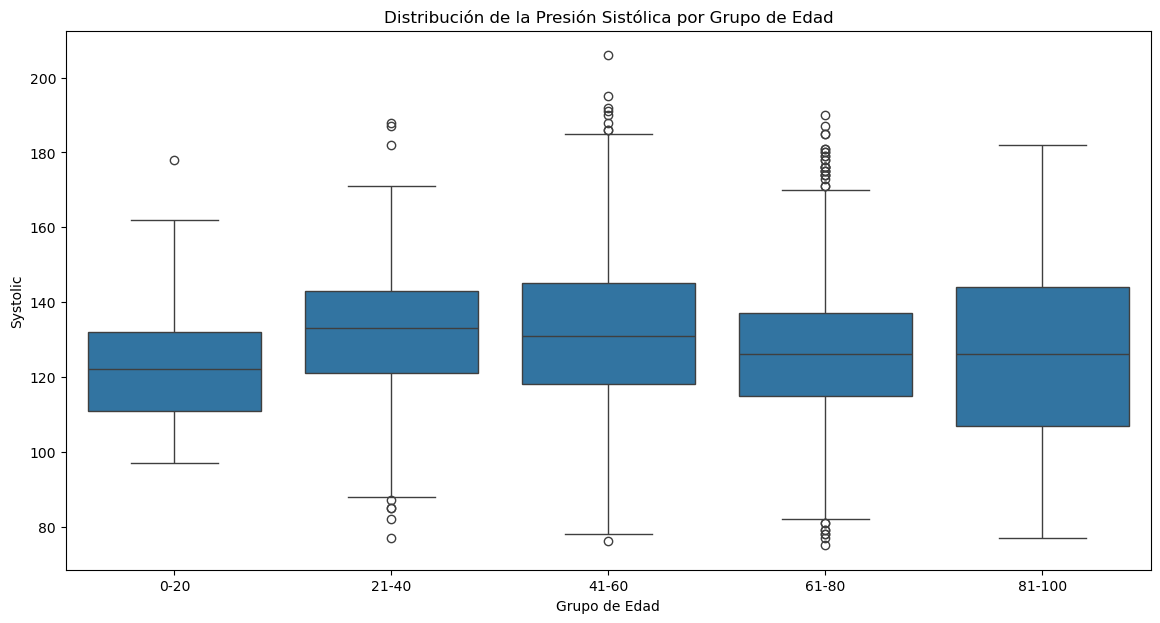

In [34]:
df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

plt.figure(figsize=(14, 7))
sns.boxplot(x='Age_Group', y='Systolic', data=df_limpio)
plt.title('Distribución de la Presión Sistólica por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Systolic')
plt.show()


- Histograma: Distribución de las variables Systolic y Diastolic en un histograma de frecuencia,
Este gráfico presenta dos histogramas en un diseño de subplots, proporcionando una visualización clara de la distribución de las variables Systolic (presión sistólica) y Diastolic (presión diastólica) en tus datos.

Histograma de Systolic (izquierda): Muestra la frecuencia de los valores de presión sistólica agrupados en intervalos definidos. Cada barra representa la cantidad de datos que caen dentro de un rango específico de presión sistólica. Este histograma te permite observar cómo se distribuyen los valores de presión sistólica, identificar posibles picos (rangos de valores con alta frecuencia) y asymetrías en la distribución.

Histograma de Diastolic (derecha): Similar al histograma de presión sistólica, este gráfico ilustra la frecuencia de los valores de presión diastólica en intervalos de rango. Ayuda a visualizar la distribución de los valores diastólicos, permitiéndote ver la forma general de la distribución, incluyendo cualquier sesgo o anomalías.

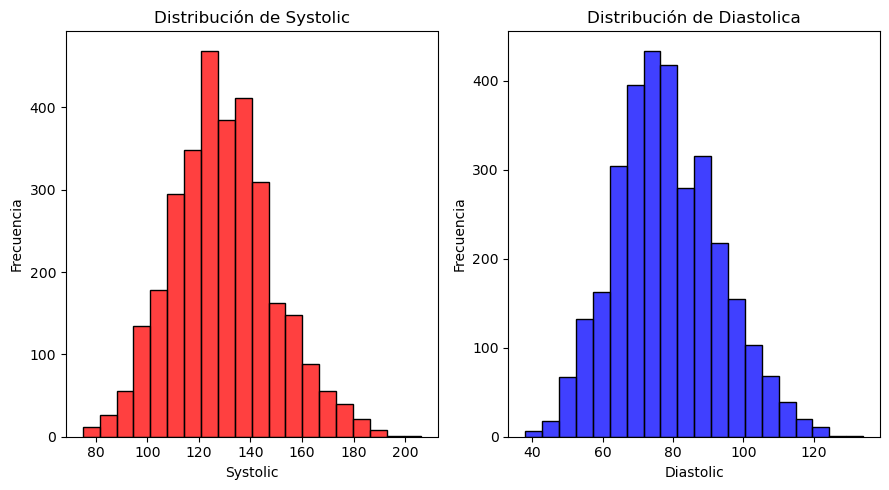

In [52]:
plt.figure(figsize=(9, 5))

# Histograma para la variable 'Systolic'
plt.subplot(1, 2, 1)
sns.histplot(df_unido['Systolic'], kde=False, bins=20, color='red')
plt.title('Distribución de Systolic')
plt.xlabel('Systolic')
plt.ylabel('Frecuencia')

# Histograma para la variable 'Diastolic'
plt.subplot(1, 2, 2)
sns.histplot(df_unido['Diastolic'], kde=False, bins=20, color='blue')
plt.title('Distribución de Diastolica')
plt.xlabel('Diastolic')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Boxplots: Comparación de Género y Presión Diastólica
Este gráfico utiliza boxplots para comparar la distribución de la presión diastólica entre diferentes categorías de género. Cada boxplot representa la distribución de los valores de presión diastólica para cada categoría de género, proporcionando una visión clara de cómo se comparan estos valores entre los grupos.
Mediana: La línea dentro de la caja representa la mediana de la diastólica por cada género.
Cuartiles: Las cajas representan el rango intercuartílico, que contiene el 50% de los datos.El límite inferior de la caja es el primer cuartil (Q1) y el límite superior es el tercer cuartil (Q3). La altura de la caja muestra la variabilidad de la presión diastólica dentro de cada categoría de género. 
Valores atípicos: los puntos fuera pueden indicar outliers, o puede indicar una distribución más dispersa.

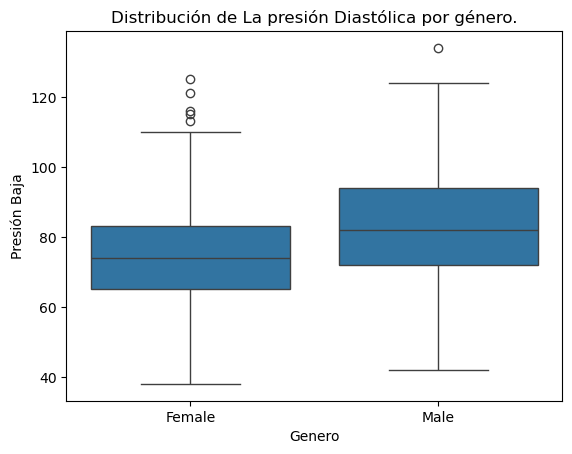

In [323]:
plt.title('Distribución de La presión Diastólica por género.')
sns.boxplot(x='GenderId', 
                y= 'Diastolic', data= df_limpio)
plt.xlabel('Genero')
plt.ylabel('Presión Baja')
plt.show()

Este barplot visualiza la presión sistólica promedio para diferentes géneros. Cada barra representa la media de la presión sistólica en una categoría de género específica, permitiendo una comparación clara entre los grupos.
Ayuda a detectar patrones o tendencias en los datos, como si hay diferencias notables en la presión sistólica promedio entre géneros.

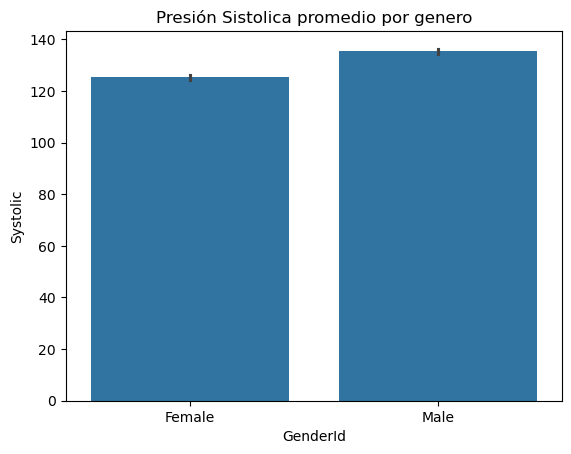

In [327]:
sns.barplot(x='GenderId', y= 'Systolic', data= df_limpio)
plt.title ('Presión Sistolica promedio por genero')
plt.show()

Calculando Matriz de correlación.: la matriz muestra cómo las variables se relacionan entre sí mediante coeficientes de correlación, que varían entre -1 y 1. Un valor cercano a 1 indica una correlación positiva fuerte, mientras que un valor cercano a -1 indica una correlación negativa fuerte. Un valor cercano a 0 indica una correlación débil o inexistente.
La matriz de correlación muestra una correlación positiva fuerte entre la presión sistólica y la presión diastólica. Esto significa que, en general, a medida que aumenta la presión sistólica, también tiende a aumentar la presión diastólica.
Implicaciones: Esta fuerte correlación sugiere que ambas medidas de presión arterial están estrechamente relacionadas y probablemente reflejan patrones similares de comportamiento en los datos. Esto es consistente con la expectativa de que las variaciones en la presión sistólica y diastólica suelen ir de la mano.
Relación Débil entre Edad y Presión Arterial Diastólica y Sistólica:
La matriz muestra una correlación débil entre la edad y las presiones sistólica y diastólica. Esto indica que la edad no tiene una influencia significativa sobre los niveles de presión arterial en los datos analizados.

In [306]:
import pandas as pd

print(df_limpio[['Diastolic', 'Systolic']].dtypes)
print(df_limpio[['Diastolic', 'Systolic']].head())

# Eliminar filas con valores faltantes en 'Diastolic' y 'Systolic'
df_limpio = df_limpio.dropna(subset=['Diastolic', 'Systolic'])

# Asegurarse de que los datos sean numéricos
df_limpio['Diastolic'] = pd.to_numeric(df_limpio['Diastolic'], errors='coerce')
df_limpio['Systolic'] = pd.to_numeric(df_limpio['Systolic'], errors='coerce')


Diastolic    float64
Systolic     float64
dtype: object
   Diastolic  Systolic
0        NaN       NaN
1        NaN       NaN
2        NaN       NaN
3        NaN       NaN
4        NaN       NaN


<function matplotlib.pyplot.show(close=None, block=None)>

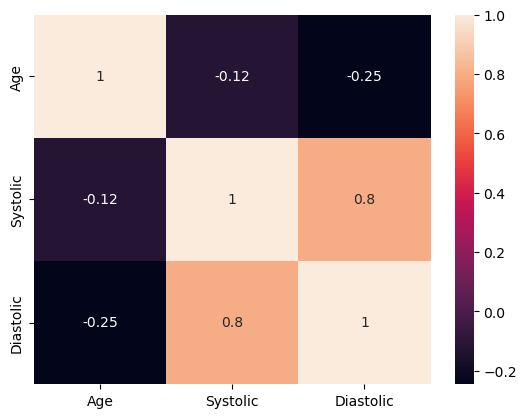

In [308]:
sns.heatmap(corr_matrix, annot=True)
plt.show

- Análisis bivariado se está examinando la relación entre dos variables: la edad (Age mayor a 30, 60 y 80 años) y la presión sistólica (Systolic). Este análisis nos ayuda a entender cómo una variable puede influir o estar relacionada con otra.
- Usamos Boxplot, Histplot y Lineplot

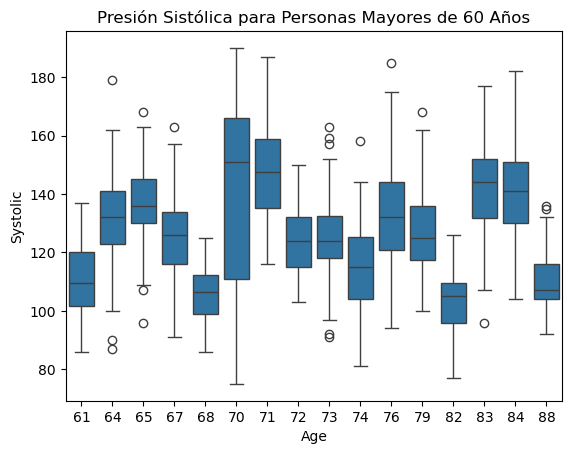

In [360]:
# Filtrar los datos para mostrar solo aquellos con edad mayor a 60 años
mayores_60_df = df_limpio[df_limpio['Age'] > 60]

# Crear el boxplot
sns.boxplot(x='Age', y='Systolic', data=mayores_60_df)
plt.title('Presión Sistólica para Personas Mayores de 60 Años')
plt.show()

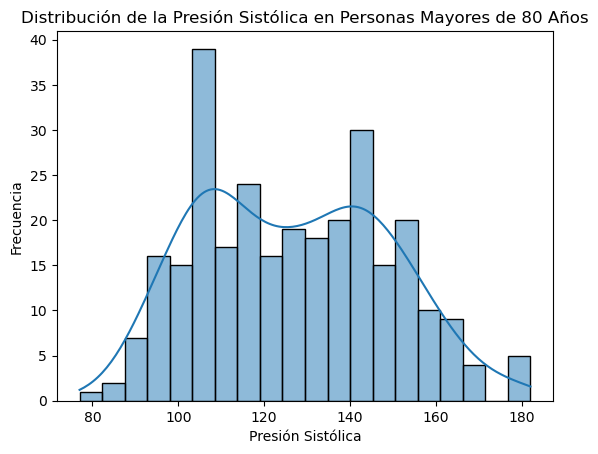

In [381]:
mayores_60_df = df_limpio[df_limpio['Age'] > 80]

sns.histplot(mayores_60_df['Systolic'], bins=20, kde=True)
plt.title('Distribución de la Presión Sistólica en Personas Mayores de 80 Años')
plt.xlabel('Presión Sistólica')
plt.ylabel('Frecuencia')
plt.show()


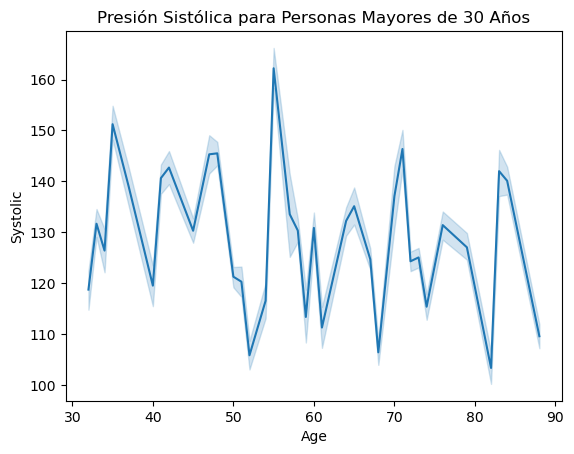

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para mostrar solo aquellos con edad mayor a 60 años
mayores_30_df = df_limpio[df_limpio['Age'] > 30]

# Crear el gráfico de líneas
sns.lineplot(x='Age', y='Systolic', data=mayores_30_df)
plt.title('Presión Sistólica para Personas Mayores de 30 Años')
plt.show()
